Found 2001 images belonging to 3 classes.
Found 2000 images belonging to 3 classes.
Epoch 1/10
63/63 [==============================] - 39s 604ms/step - loss: 1.0876 - accuracy: 0.3783 - val_loss: 1.0727 - val_accuracy: 0.3555
Epoch 2/10
63/63 [==============================] - 9s 147ms/step - loss: 1.0683 - accuracy: 0.4083 - val_loss: 1.0499 - val_accuracy: 0.4205
Epoch 3/10
63/63 [==============================] - 11s 171ms/step - loss: 1.0498 - accuracy: 0.4428 - val_loss: 1.0304 - val_accuracy: 0.4610
Epoch 4/10
63/63 [==============================] - 9s 146ms/step - loss: 1.0261 - accuracy: 0.4588 - val_loss: 1.0011 - val_accuracy: 0.5075
Epoch 5/10
63/63 [==============================] - 9s 139ms/step - loss: 1.0011 - accuracy: 0.4798 - val_loss: 0.9786 - val_accuracy: 0.4740
Epoch 6/10
63/63 [==============================] - 12s 195ms/step - loss: 0.9947 - accuracy: 0.4818 - val_loss: 0.9516 - val_accuracy: 0.5195
Epoch 7/10
63/63 [==============================] - 11s 172ms

c:\Users\sachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 2s 36ms/step - loss: 0.8912 - accuracy: 0.5640
Testing Accuracy: 56.40%
63/63 [==============================] - 6s 87ms/step - loss: 0.9047 - accuracy: 0.5507
Training Accuracy: 55.07%
63/63 [==============================] - 2s 29ms/step


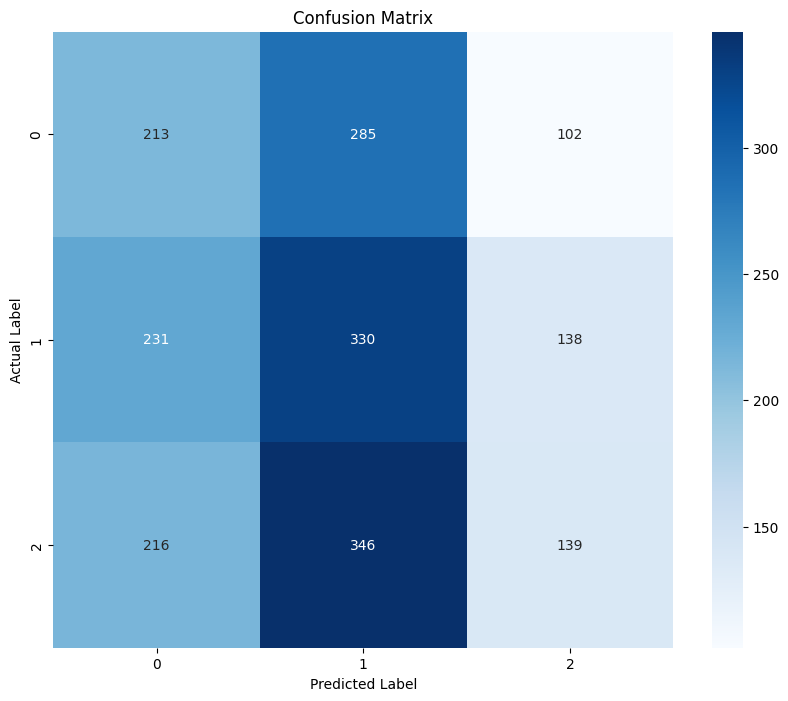

In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

basepath = "/Desktop/BEPROJECT-Final/Retinal Diseases Detection"
if not os.path.exists(basepath):
    raise Exception("Base path does not exist. Please check the path and try again.")

# Initializing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding second convolution layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding third convolution layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(3, activation='softmax'))  # Assuming 3 classes for the output

# Compiling the CNN
classifier.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Part 2 - Fitting the CNN to the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    os.path.join(basepath, 'training_set'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    os.path.join(basepath, 'test_set'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

steps_per_epoch = int(np.ceil(training_set.samples / 32))
val_steps = int(np.ceil(test_set.samples / 32))

# Fitting the CNN to the images
history = classifier.fit(
    training_set,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_set,
    validation_steps=val_steps
)

# Saving the model
classifier.save(os.path.join(basepath, 'disease_model.h5'))

# Evaluate the model
scores = classifier.evaluate(test_set, verbose=1)
B = "Testing Accuracy: %.2f%%" % (scores[1] * 100)
print(B)

scores = classifier.evaluate(training_set, verbose=1)
C = "Training Accuracy: %.2f%%" % (scores[1] * 100)
print(C)

msg = B + '\n' + C



# Generating Confusion Matrix and Classification Report
Y_pred = classifier.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_set.classes

cm = confusion_matrix(y_true, y_pred)
class_names = list(test_set.class_indices.keys())

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig(os.path.join(basepath, "confusion_matrix_CNN.png"), bbox_inches='tight')
plt.show()

In [ ]:
# this file is only to generate the Confusion  matrix


#  So Read it and Execute Properly